# Assignment 2 Part 1
Python 3.6



### Loading all required Library functions

In [1]:
import mnist
import os
import numpy as np
import matplotlib.pyplot as plt
import timeit

import sigmoid
import softmax
import forward
import backward
import gradientTest
import dataNormalizer
import train
import grad_check


%load_ext autoreload
%autoreload 2

### Loading training, validation & test datasets

In [2]:
# Load the dataset
X_trainData, y_trainData, X_testData, y_testData = mnist.load()

### Setting Parameters

In [21]:
# Parameters
Epoch = 10
numHiddenLayers = 100
numClasses = np.max(y_trainData) + 1
num_training = 59000
num_validation = 1000
num_test = 1000
learningRate = 1e-3
reg = 1e-4
batch_size = 10

## Normailzing the data & initializing weights


In [22]:
# Split & Normalize data set
X_train, y_train, X_val, y_val, X_test, y_test = dataNormalizer.datasplit(X_trainData, y_trainData,
                                                                          X_testData, y_testData,
                                                                          num_training, num_validation, num_test)

# Getting Data stats
num_data_train, data_size = np.shape(X_train)

# Initializing Weights
weight_inputToHidden = np.random.random((data_size, numHiddenLayers)) * 1e-4
weight_hiddenToOutput = np.random.random((numHiddenLayers, numClasses)) * 1e-4
biasHidden = np.random.random(numHiddenLayers) * 1e-4
biasOutput = np.random.random(numClasses) * 1e-4

print(np.shape(X_train))


(59000, 784)


### Initializing vectors to store Accuracy & Loss

In [23]:
# Initialize Accuracy List
trainAccuracy = np.zeros(1)
validAccuracy = np.zeros(1)

# Initialize Loss List
trainLoss = np.zeros(1)
validLoss = np.zeros(1)

### Checking backward propagation


In [24]:
# loss, grad_hiddenToOutput, grad_inputToHidden, grad_biasOutput, grad_biasHidden = backward.backward(X_train, y_train,
#                                         weight_inputToHidden, weight_hiddenToOutput,
#                                         biasHidden, biasOutput)

# print('Loss : ', loss)
# print('grad_hiddenToOutput : ', grad_hiddenToOutput.shape)
# print('grad_inputToHidden : ', grad_inputToHidden.shape)
# print('grad_biasOutput : ', grad_biasOutput.shape)
# print('grad_biasHidden : ', grad_biasHidden.shape)


### Training

In [25]:
# train
#
print('Training...')
startTime = timeit.default_timer()

loss, weight_inputToHidden, weight_hiddenToOutput, biasHidden, biasOutput =\
    train.train(X_train, y_train, weight_inputToHidden, weight_hiddenToOutput,
                biasHidden, biasOutput, learningRate, reg, Epoch, verbose=True)

stopTime = timeit.default_timer()

print('Time Taken : ', stopTime-startTime)

Training...


E:\Education\ANU\OneDrive - Australian National University\ENGN8536 Advanced Topics\Assignment\Assignment 2\Code_A2\sigmoid.py:5: RuntimeWarning: overflow encountered in exp
  output = 1 / (1 + np.exp(-inputValue))


iteration 0 / 10: loss 1.740743
Time Taken :  38.250952159452936
Training accuracy: 0.884932
iteration 5 / 10: loss 1.861895
Time Taken :  36.26958274950243
Training accuracy: 0.888068
Time Taken :  375.87665465545115


### Plot Loss

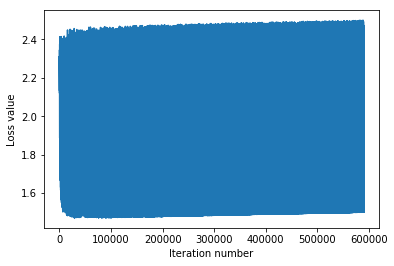

In [26]:
# Plot loss function as iteration number.
plt.plot(loss)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

### Prediction & Accuracy

In [27]:
# Forward / Prediction
print('')
output, classOutput = forward.forward(X_train, weight_inputToHidden, weight_hiddenToOutput, biasHidden, biasOutput)

print('training accuracy: {:f}'.format(np.mean(y_train == classOutput)))

print('')
outputVal, classOutputVal = forward.forward(X_val, weight_inputToHidden, weight_hiddenToOutput, biasHidden, biasOutput)

print('Validation accuracy: {:f}'.format(np.mean(y_val == classOutputVal)))


# print(classOutput [2])
# print(output [2])
# print(y_train[2])



training accuracy: 0.872542

Validation accuracy: 0.905000


E:\Education\ANU\OneDrive - Australian National University\ENGN8536 Advanced Topics\Assignment\Assignment 2\Code_A2\sigmoid.py:5: RuntimeWarning: overflow encountered in exp
  output = 1 / (1 + np.exp(-inputValue))


## Visualization

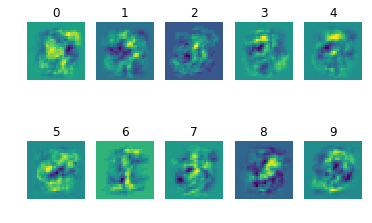

In [28]:
# Visualize the learned weights for each class
# w = best_classifier.W#[:-1,:] # strip out the bias
w = weight_inputToHidden.reshape(28, 28, 100)

w_min, w_max = np.min(w), np.max(w)

classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
for i in range(10):
    plt.subplot(2, 5, i + 1)
    
    # Rescale the weights to be between 0 and 255
    wimg = 255.0 * (w[:, :, i].squeeze() - w_min) / (w_max - w_min)
    plt.imshow(wimg.astype('uint8'))
    plt.axis('off')
    plt.title(classes[i])

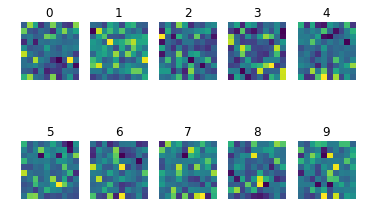

In [29]:
w = weight_hiddenToOutput.reshape(10, 10, 10)

w_min, w_max = np.min(w), np.max(w)

classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
for i in range(10):
    plt.subplot(2, 5, i + 1)
    
    # Rescale the weights to be between 0 and 255
    wimg = 255.0 * (w[:, :, i].squeeze() - w_min) / (w_max - w_min)
    plt.imshow(wimg.astype('uint8'))
    plt.axis('off')
    plt.title(classes[i])